In [2]:
import platform
import io

import matplotlib.pyplot as plt
from google.colab import files
from matplotlib.pyplot import cm 

def install_pytorch():
    os = platform.system()
    if os == "Linux":
        !pip3 install http://download.pytorch.org/whl/cu90/torch-0.4.0-cp36-cp36m-linux_x86_64.whl
    elif os == "Windows":
        !pip3 install http://download.pytorch.org/whl/cu90/torch-0.4.0-cp36-cp36m-win_amd64.whl 
    !pip3 install torchvision


# Install PyTorch.
install_pytorch()


import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
import torch
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

train_dataset = MNIST(root='../data', 
                      train=True, 
                      transform=transforms.ToTensor(),  
                      download=True)

test_dataset = MNIST(root='../data', 
                     train=False, 
                     transform=transforms.ToTensor())

batch_size = 100

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Processing...
Done!


In [0]:
# It's important to appreciate the data format, e.g. dimensions, type, etc. 

dd = list(train_dataset)

Target: 5


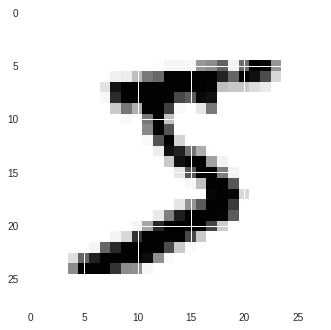

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# dd[0]: first image and associated target
# dd[0][0]: 1 x N x M image
# dd[0][1]: target 

img = dd[0][0].squeeze(0)          # B&W image dimensions : N x M 
target = dd[0][1]

print('Target: {}'.format(target))
plt.imshow(img)
plt.show()

In [6]:
use_gpu = torch.cuda.is_available()

print("GPU Available: {}".format(use_gpu))

GPU Available: True


In [7]:
# add dropout 


import torch.nn as nn

input_size = 784
hidden_size = 500
num_classes = 10

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()

        self.hidden_layer = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU())
        
        self.output_layer = nn.Sequential(
            nn.Linear(hidden_size, num_classes))
    
    def forward(self, x):        
        
        out = self.hidden_layer(x)
        
        out = self.output_layer(out)
        
        return out

model = MLP(input_size, hidden_size, num_classes)

if use_gpu:
  # switch model to GPU
  model.cuda()

print(model)

print("# parametre: ", sum([param.nelement() for param in model.parameters()]))

MLP(
  (hidden_layer): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): ReLU()
  )
  (output_layer): Sequential(
    (0): Linear(in_features=500, out_features=10, bias=True)
  )
)
# parametre:  648010


In [0]:
learning_rate = 1e-3

criterion = nn.CrossEntropyLoss()  

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
total_loss = []

num_epochs = 1
for epoch in range(num_epochs):
    
    train_loss = 0
    n_iter = 0
    
    # Iterate over data.
    for i, (images, labels) in enumerate(train_loader):  
        
        if use_gpu:
          # switch tensor type to GPU
          images = images.cuda()
          labels = labels.cuda()
        
        # Flatten the images
        images = images.view(-1, 28*28)
        
        # Zero the gradient buffer
        optimizer.zero_grad()  
        
        # Forward
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        total_loss.append(loss)
        # Backward
        loss.backward()
        
        # Optimize
        optimizer.step()
        
        # Statistics
        train_loss += loss.data[0]
        n_iter += 1
    
    print('Epoch: {}/{}, Loss: {:.4f}'.format(
          epoch+1, num_epochs, train_loss/n_iter))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 1/1, Loss: 1.0410


In [19]:
# Set model to evaluate mode
model.eval()

correct = 0
total = 0

# Iterate over data.
for images, labels in test_loader:
    
    if use_gpu:
      # switch tensor type to GPU
      images = images.cuda()
      labels = labels.cuda()    
      
    # Flatten the images
    images = images.view(-1, 28*28)
    
    # Forward
    outputs = model(images)
    loss = criterion(outputs, labels)  
    _, predicted = torch.max(outputs.data, 1)
    
    # Statistics
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy on the test set: {}%'.format(100 * correct / total))

Accuracy on the test set: 80%


In [15]:
type(outputs)

torch.Tensor